Create a property graph of the files on folders in a given folder

In [1]:
!pip install graphviz

You should consider upgrading via the '/Users/msarica/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import glob

https://stackoverflow.com/questions/2186525/use-a-glob-to-find-files-recursively-in-python

In [3]:
for filename in glob.iglob('./**/*', recursive=True):
    print(filename)

./example1_graph.png
./2_networkx.ipynb
./1_graphviz_for_static_graph_visualization.ipynb
./Movie Graph.ipynb
./test-output
./4_files_and_folders.ipynb
./3_pycallgraph.ipynb
./data
./pycallgraph.png
./test-output/parrot.png
./test-output/filename.png
./test-output/files_and_folders
./test-output/fld_test.png
./test-output/round-table
./test-output/fld_test
./test-output/round-table.png
./test-output/files_and_folders.png
./test-output/parrot
./test-output/filename
./data/The.Matrix.1999.720p.BluRay.264.YIFY.txt


glob doesn't support hidden directories :(

https://docs.python.org/3/library/glob.html

<BR>
<BR>
<BR>

So instead recursively enter every directory

https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python

In [4]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [5]:
list_files('.')

./
    .DS_Store
    example1_graph.png
    2_networkx.ipynb
    1_graphviz_for_static_graph_visualization.ipynb
    Movie Graph.ipynb
    4_files_and_folders.ipynb
    3_pycallgraph.ipynb
    pycallgraph.png
    test-output/
        parrot.png
        filename.png
        files_and_folders
        fld_test.png
        round-table
        fld_test
        round-table.png
        files_and_folders.png
        parrot
        filename
    .ipynb_checkpoints/
        3_pycallgraph-checkpoint.ipynb
        4_files_and_folders-checkpoint.ipynb
        1_graphviz_for_static_graph_visualization-checkpoint.ipynb
        2_networkx-checkpoint.ipynb
        Movie Graph-checkpoint.ipynb
    data/
        The.Matrix.1999.720p.BluRay.264.YIFY.txt


https://www.quora.com/Whats-the-easiest-way-to-recursively-get-a-list-of-all-the-files-in-a-directory-tree-in-Python

This yields information equivalent to <BR>
!find

In [7]:
from os import walk
path ="." # current directory
for (dirpath, dirnames, filenames) in walk(path):
    print('current location:',dirpath)
    print('folders:         ',dirnames)
    print('files:           ',filenames,'\n')

current location: .
folders:          ['test-output', '.ipynb_checkpoints', 'data']
files:            ['.DS_Store', 'example1_graph.png', '2_networkx.ipynb', '1_graphviz_for_static_graph_visualization.ipynb', 'Movie Graph.ipynb', '4_files_and_folders.ipynb', '3_pycallgraph.ipynb', 'pycallgraph.png'] 

current location: ./test-output
folders:          []
files:            ['parrot.png', 'filename.png', 'files_and_folders', 'fld_test.png', 'round-table', 'fld_test', 'round-table.png', 'files_and_folders.png', 'parrot', 'filename'] 

current location: ./.ipynb_checkpoints
folders:          []
files:            ['3_pycallgraph-checkpoint.ipynb', '4_files_and_folders-checkpoint.ipynb', '1_graphviz_for_static_graph_visualization-checkpoint.ipynb', '2_networkx-checkpoint.ipynb', 'Movie Graph-checkpoint.ipynb'] 

current location: ./data
folders:          []
files:            ['The.Matrix.1999.720p.BluRay.264.YIFY.txt'] 



For more complicated view, look at the parent directory

In [8]:
from graphviz import Digraph, Graph

In [9]:
fld = Digraph(comment='files and folders')

In [10]:
fld.clear()

In [11]:
fld.node('/full/path/to/fldr', 'fldr')
fld.node('B', 'Sir Bedevere the Wise')
fld.node('L', 'Sir Lancelot the Brave')

fld.edge('B', 'L')
fld.edge('B', '/full/path/to/fldr')

In [12]:
print(fld.source)

// files and folders
digraph {
	"/full/path/to/fldr" [label=fldr]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	B -> L
	B -> "/full/path/to/fldr"
}


In [13]:
fld.format = 'png'
fld.render('test-output/fld_test', view=False)

'test-output/fld_test.png'

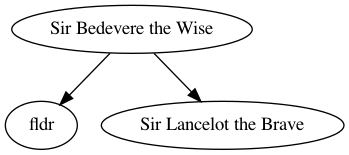

In [14]:
from IPython.display import Image
Image("test-output/fld_test.png")

In [15]:
fld.clear()

path ="." # current directory
for (dirpath, dirnames, filenames) in walk(path):
    fld.node(dirpath, dirpath) # current location
    for this_subfolder in dirnames:
        fld.node(dirpath+'/'+this_subfolder, this_subfolder)
        fld.edge(dirpath, dirpath+'/'+this_subfolder)
    for this_file in filenames:
        fld.node(dirpath+'/'+this_file, this_file)
        fld.edge(dirpath, dirpath+'/'+this_file)

In [16]:
#print(fld.source)

In [17]:
fld.format = 'png'
fld.render('test-output/files_and_folders', view=False)

'test-output/files_and_folders.png'

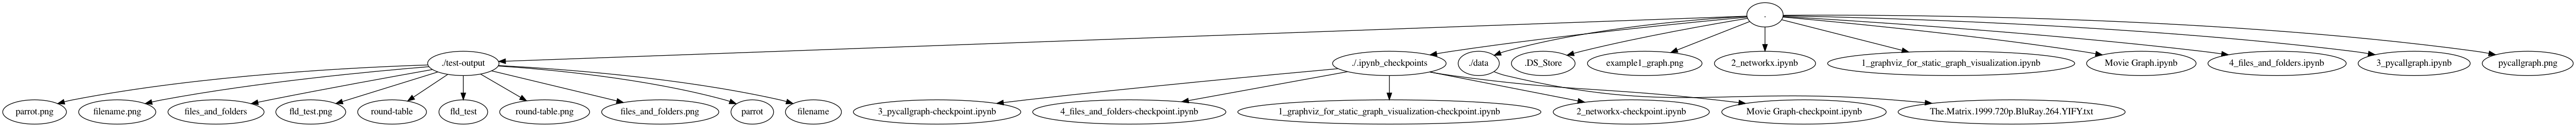

In [18]:
Image("test-output/files_and_folders.png")

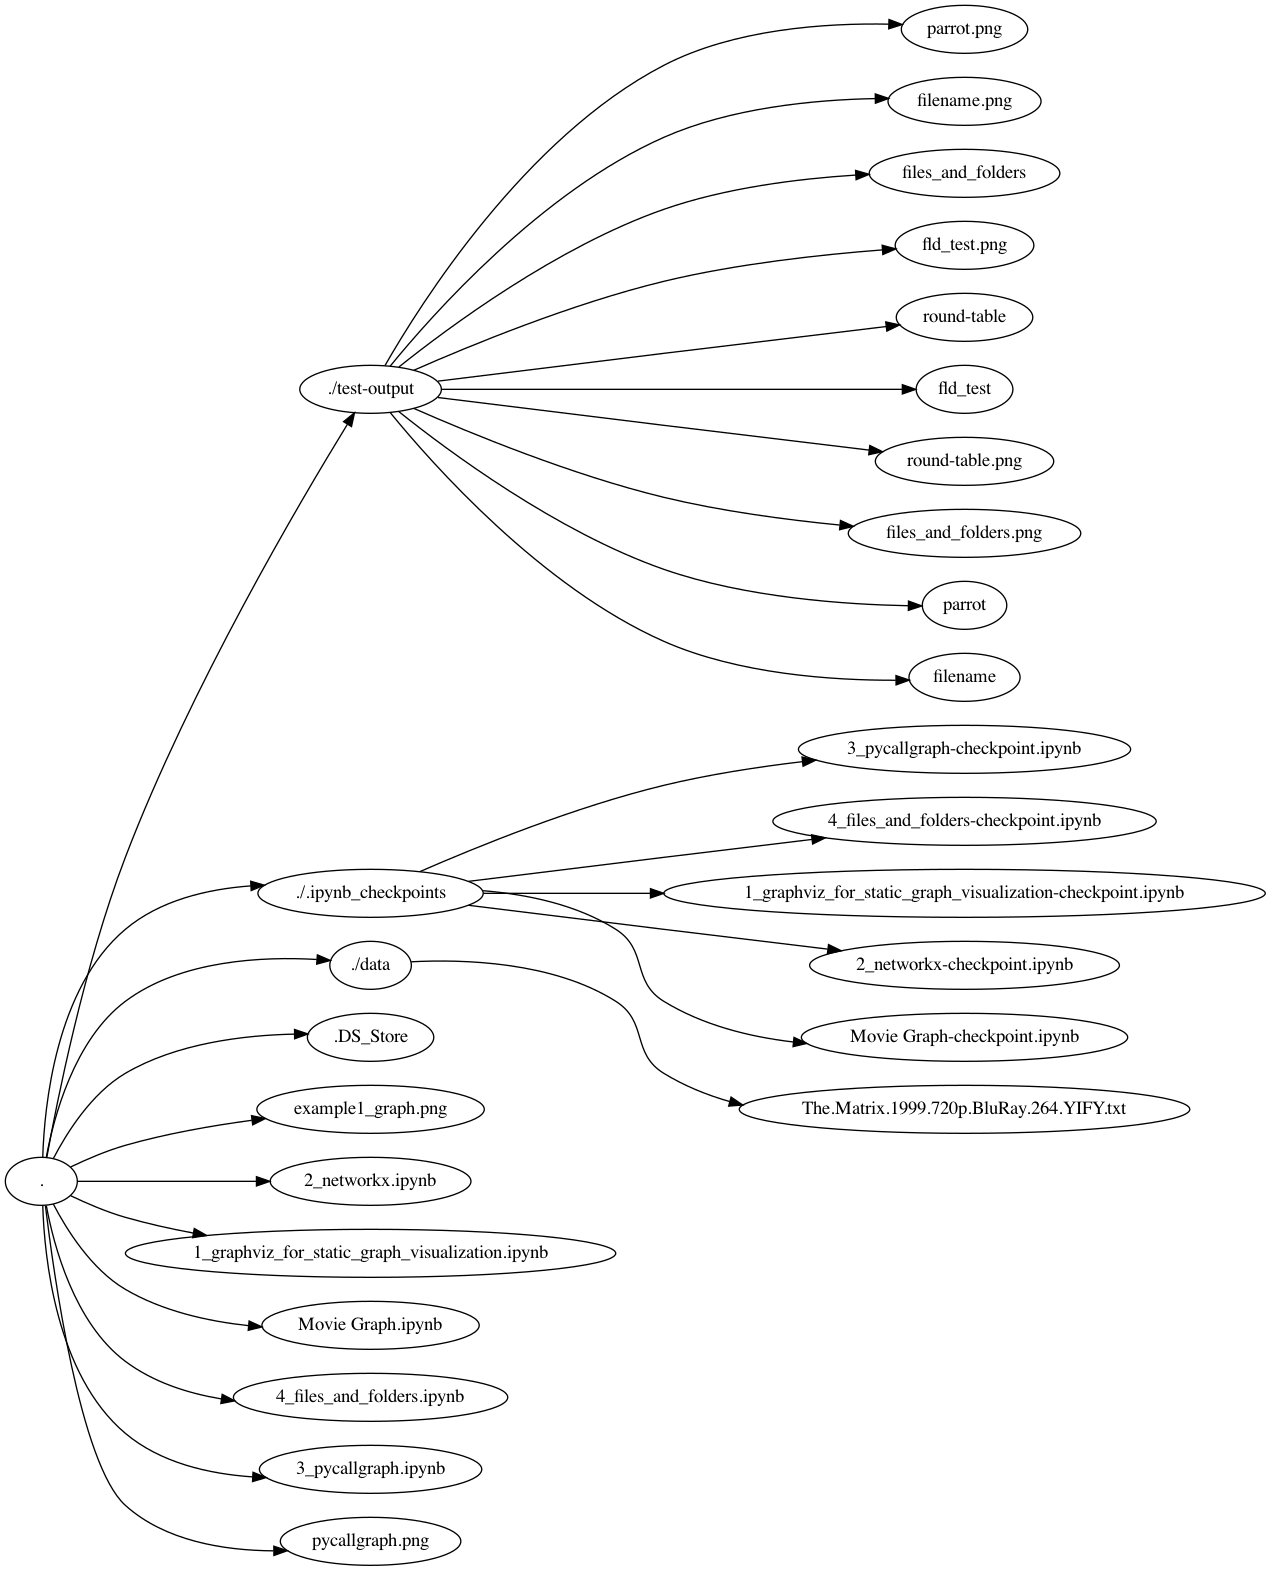

In [19]:
fld.graph_attr['rankdir'] = 'LR'
fld.render('test-output/files_and_folders', view=False)
Image("test-output/files_and_folders.png")

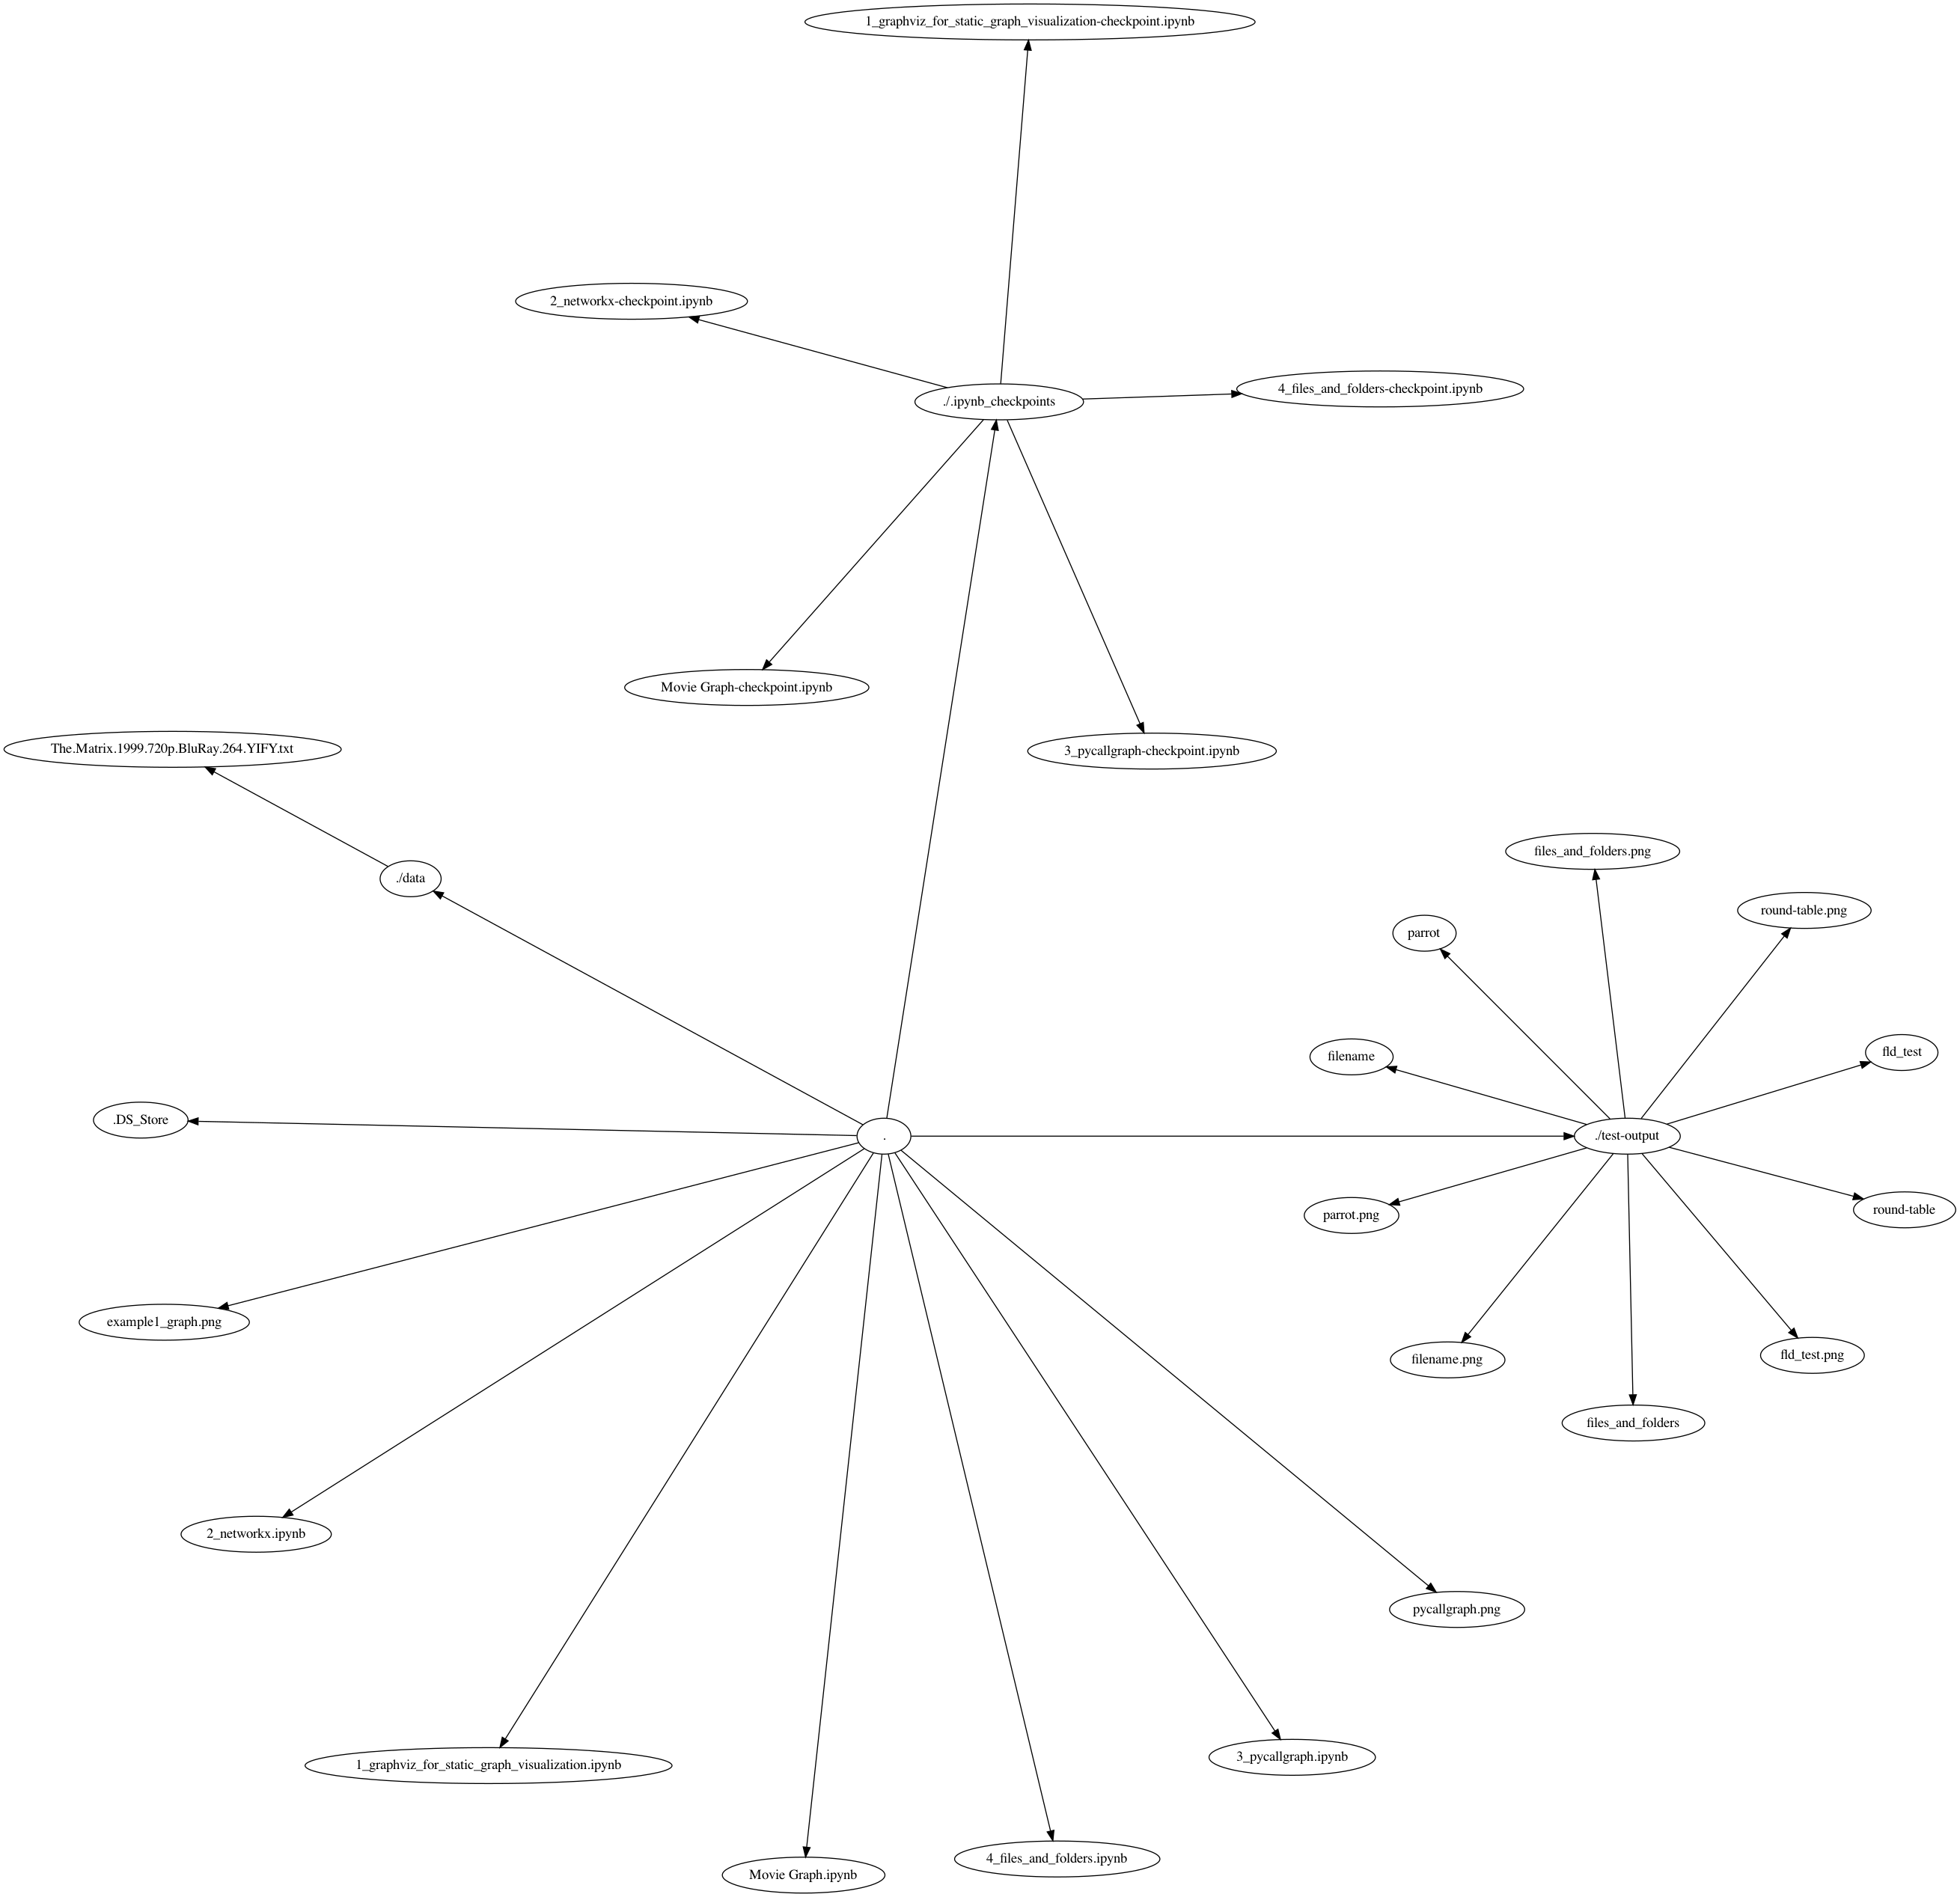

In [20]:
fld.engine = 'circo'
fld.render('test-output/files_and_folders', view=False)
Image("test-output/files_and_folders.png")

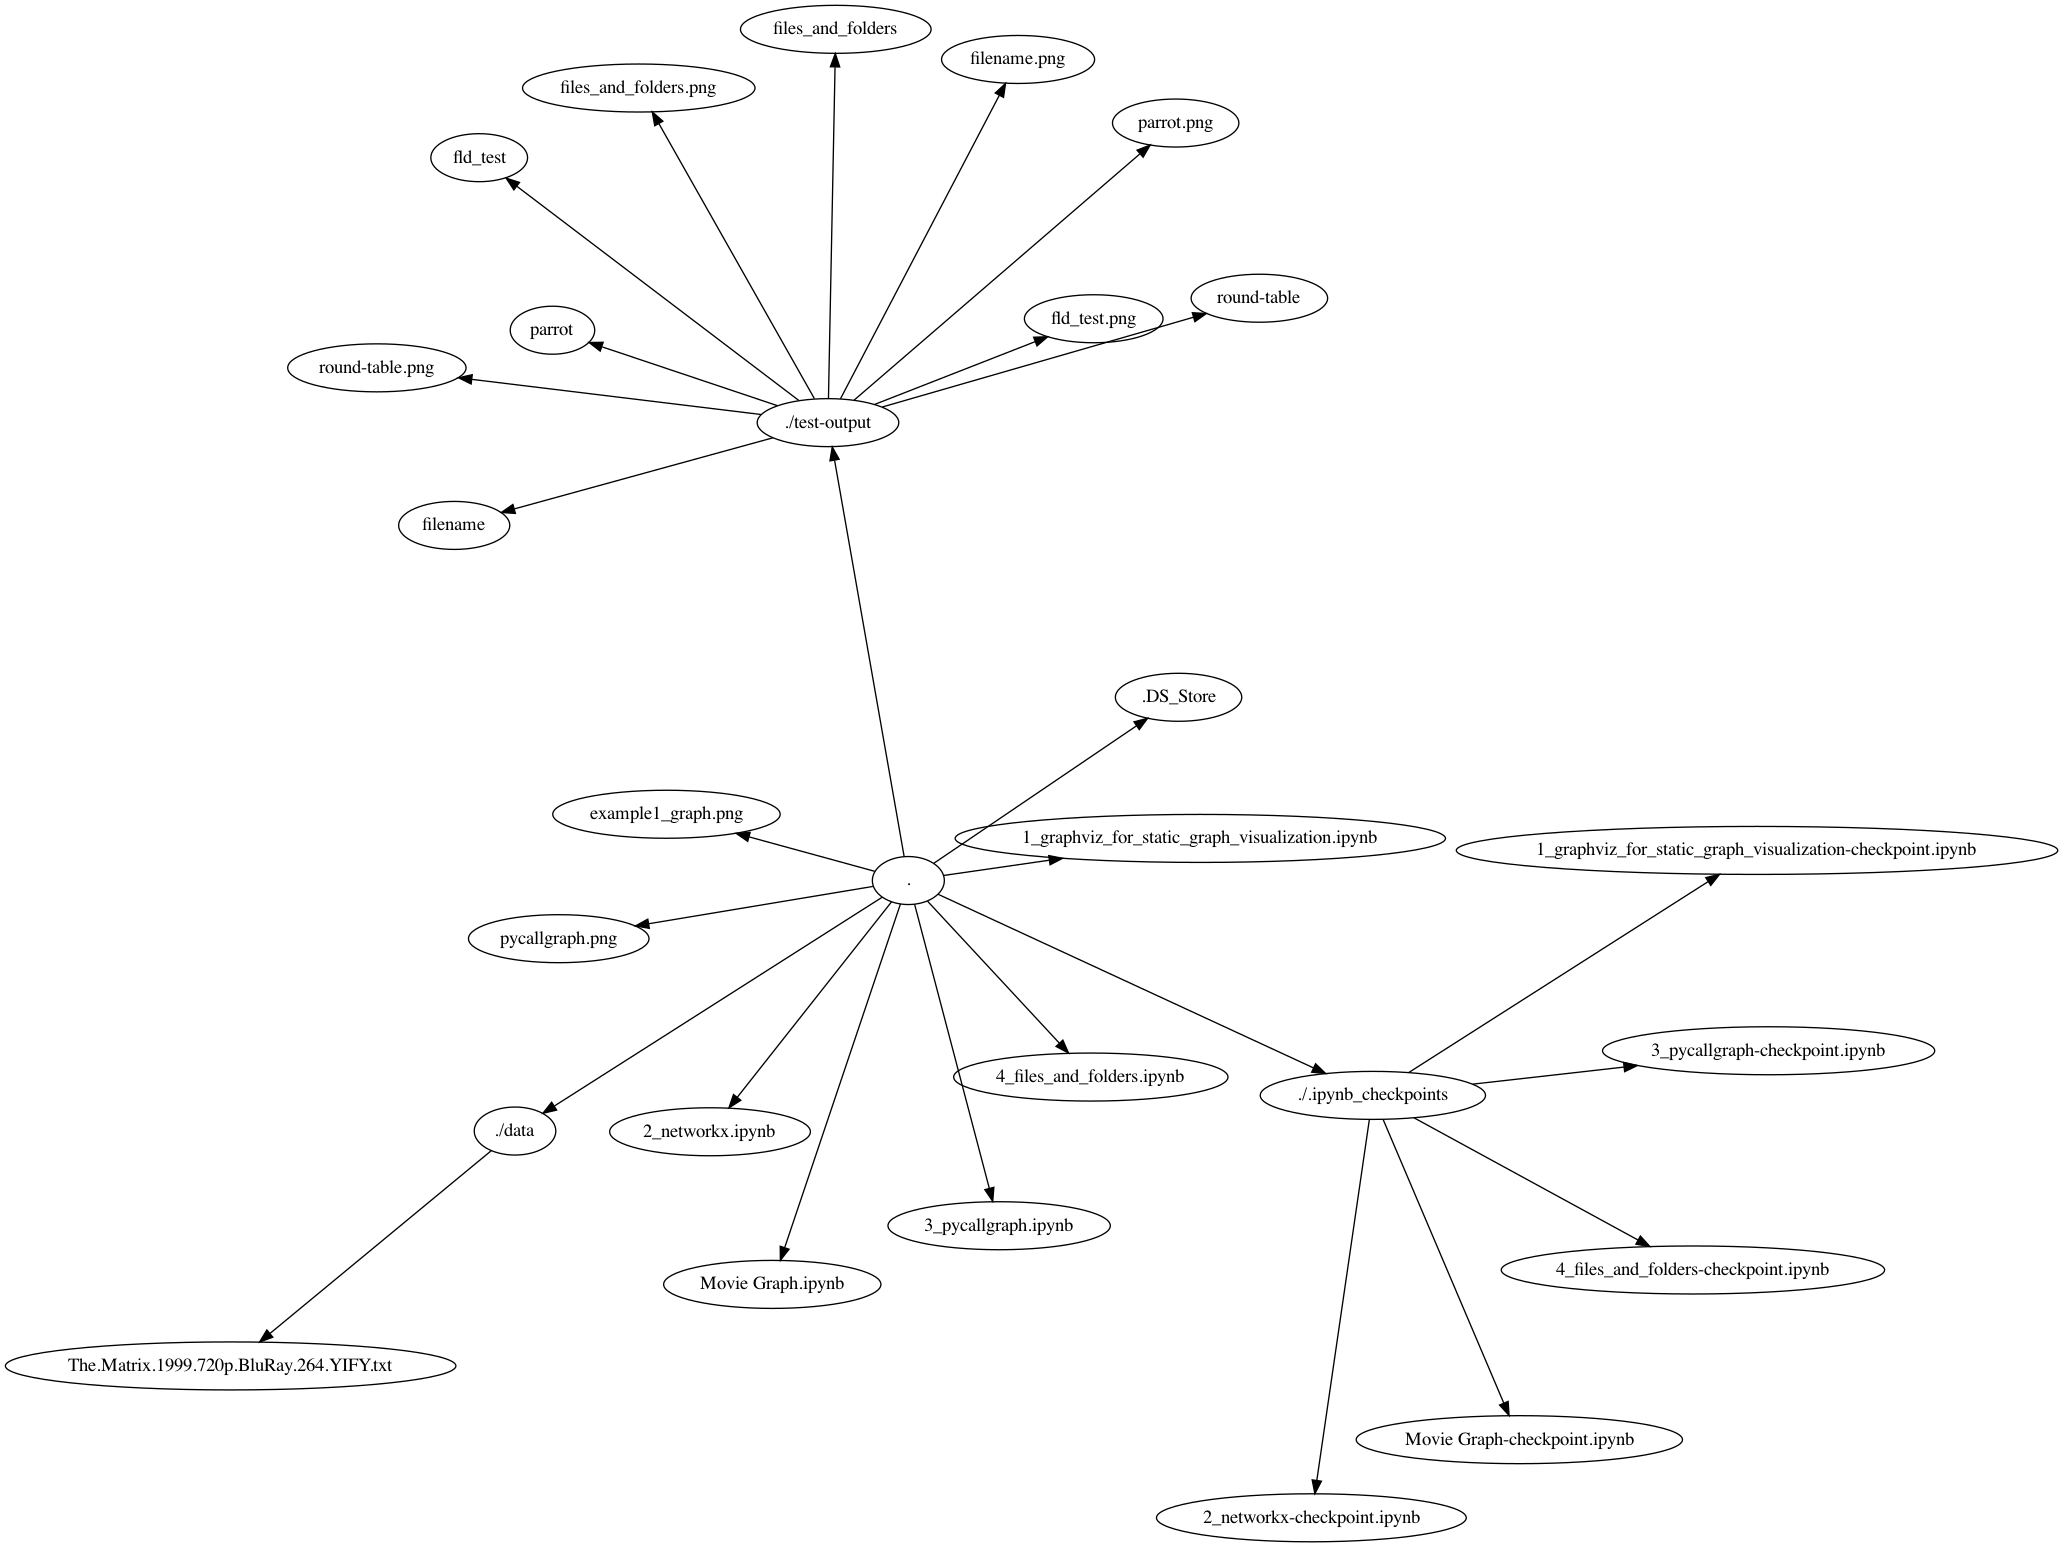

In [21]:
fld.engine = 'neato'#'twopi'
fld.attr(overlap='false')
fld.render('test-output/files_and_folders', view=False)
Image("test-output/files_and_folders.png")